In [91]:
import os
import sys
import pandas as pd
import numpy as np
# import random
import matplotlib.pyplot as plt
from similar_companies_choice import get_similar_comp_ranking
from data_preparation import get_financial_data
from data_preparation import compute_ratios
from sklearn.linear_model import LinearRegression

os.chdir(sys.path[0])

In [92]:
studied_comp_ticker = "XBIT"
similarity_ranking = get_similar_comp_ranking(studied_comp_ticker)

Number of missing values per column in the dataset:

Ticker                  0
IND_GICS                3
SUB_IND_GICS            3
CUR_MKT_CAP             1
REGION_NAME             0
NUM_OF_EMPLOYEES      353
SUSTAIN_GROWTH_RT    1217
dtype: int64


In [93]:
studied_comp_similarity_data = similarity_ranking.iloc[:1]
similarity_ranking = similarity_ranking.iloc[1:]
print("Studied company's data for columns used for similarity comparison :")
studied_comp_similarity_data

Studied company's data for columns used for similarity comparison :


,IND_GICS,SUB_IND_GICS,CUR_MKT_CAP,REGION_NAME,NUM_OF_EMPLOYEES,SUSTAIN_GROWTH_RT,similarity_score
Ticker,,,,,,,
XBIT,Health Care,Biotechnology,269337877.7,United States,91.0,NaN,0.0


In [94]:
print("List of companies ranked similarity of sector/sub-industry, geography, market cap, number of employees and sustainable growth rate:")
similarity_ranking.head(10)

List of companies ranked similarity of sector/sub-industry, geography, market cap, number of employees and sustainable growth rate:


,IND_GICS,SUB_IND_GICS,CUR_MKT_CAP,REGION_NAME,NUM_OF_EMPLOYEES,SUSTAIN_GROWTH_RT,similarity_score
Ticker,,,,,,,
SPRO,Health Care,Biotechnology,258588936.0,United States,89.0,NaN,0.004982
LXRX,Health Care,Biotechnology,306666779.6,United States,87.0,NaN,0.014112
NKTX,Health Care,Biotechnology,314666913.3,United States,95.0,NaN,0.016171
TALS,Health Care,Biotechnology,316659590.4,United States,82.0,NaN,0.020881
MEIP,Health Care,Biotechnology,230729920.6,United States,76.0,NaN,0.025461
KOD,Health Care,Biotechnology,373409055.0,United States,93.0,NaN,0.029281
MRSN,Health Care,Biotechnology,327304988.6,United States,110.0,NaN,0.029530
ORIC,Health Care,Biotechnology,254013035.7,United States,61.0,NaN,0.032290
KRON,Health Care,Biotechnology,391685597.8,United States,96.0,NaN,0.035515


In [95]:
group_size = 5
print(f"\nThese {group_size} companies will be chosen to form the group to compare with, based on similarity :")
symbols_comp_group = similarity_ranking[:group_size].index.tolist()
print(symbols_comp_group)


These 5 companies will be chosen to form the group to compare with, based on similarity :
['SPRO', 'LXRX', 'NKTX', 'TALS', 'MEIP']


In [96]:
studied_com_fin_data = get_financial_data([studied_comp_ticker])
companies_data = get_financial_data(symbols_comp_group)

In [97]:
studied_com_fin_data

,Ticker,CUR_MKT_CAP,CURR_ENTP_VAL,EBIT,EBITDA,GROSS_PROFIT,PE_RATIO
206,XBIT,269337877.7,30.460878,-18.276,-16.038,9.449,NaN


In [98]:
companies_data

,Ticker,CUR_MKT_CAP,CURR_ENTP_VAL,EBIT,EBITDA,GROSS_PROFIT,PE_RATIO
58,NKTX,314666913.3,69.779913,-51.508,-48.866,0.000,NaN
937,SPRO,258588936.0,142.407936,-79.113,-77.126,NaN,NaN
1506,TALS,316659590.4,61.925590,-22.684,-22.237,NaN,NaN
1512,LXRX,306666779.6,221.012780,-87.090,-86.798,0.298,NaN
1569,MEIP,230729920.6,52.820921,-69.685,-67.893,24.127,NaN


In [99]:
print("Number of missing values per column :\n")
print(companies_data.isnull().sum())

Number of missing values per column :

Ticker           0
CUR_MKT_CAP      0
CURR_ENTP_VAL    0
EBIT             0
EBITDA           0
GROSS_PROFIT     2
PE_RATIO         5
dtype: int64


In [100]:
# droping rows with NaN
# nbr_of_na = companies_data.isna().sum().sum()
# if (nbr_of_na > 0):
#     print(f"{nbr_of_na} missing values. Rows with NaN will be dropped.")
#     companies_data = companies_data.dropna(axis='rows')

In [101]:
studied_com_fin_data = compute_ratios(studied_com_fin_data)
companies_data = compute_ratios(companies_data)

In [102]:
studied_com_fin_data

,Ticker,CUR_MKT_CAP,CURR_ENTP_VAL,EBIT,EBITDA,GROSS_PROFIT,PE_RATIO,EV_EBIT_ratio,EV_EBITDA_ratio,EV_GROSS_PROFIT_ratio
206,XBIT,269337877.7,30.460878,-18.276,-16.038,9.449,NaN,-1.666715,-1.899294,3.223714


In [104]:
studied_com_fin_data = studied_com_fin_data.set_index("Ticker")
companies_data = companies_data.set_index("Ticker")

In [103]:
companies_data

,Ticker,CUR_MKT_CAP,CURR_ENTP_VAL,EBIT,EBITDA,GROSS_PROFIT,PE_RATIO,EV_EBIT_ratio,EV_EBITDA_ratio,EV_GROSS_PROFIT_ratio
58,NKTX,314666913.3,69.779913,-51.508,-48.866,0.000,NaN,-1.354739,-1.427985,inf
937,SPRO,258588936.0,142.407936,-79.113,-77.126,NaN,NaN,-1.800057,-1.846432,NaN
1506,TALS,316659590.4,61.925590,-22.684,-22.237,NaN,NaN,-2.729924,-2.784800,NaN
1512,LXRX,306666779.6,221.012780,-87.090,-86.798,0.298,NaN,-2.537752,-2.546289,741.653623
1569,MEIP,230729920.6,52.820921,-69.685,-67.893,24.127,NaN,-0.757996,-0.778002,2.189287


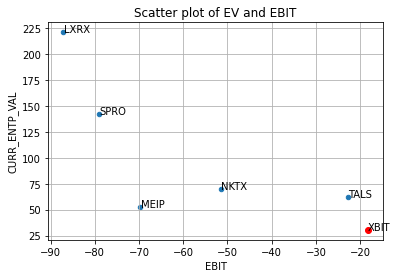

In [105]:
#Scatter plot
stat = "EBIT"
ax = companies_data.plot.scatter(stat, "CURR_ENTP_VAL", title=f"Scatter plot of EV and {stat}")
plt.scatter(studied_com_fin_data[stat], studied_com_fin_data['CURR_ENTP_VAL'], color='red')
plt.grid()
# Annotate each data point
for i, txt in enumerate(companies_data.index):
   ax.annotate(txt, (companies_data[stat].iat[i]+0.05, companies_data["CURR_ENTP_VAL"].iat[i]))
for i, txt in enumerate(studied_com_fin_data.index):
   ax.annotate(txt, (studied_com_fin_data[stat].iat[i]+0.05, studied_com_fin_data["CURR_ENTP_VAL"].iat[i]))

In [106]:
#calcul des moyennes
print("\nAverages :")
# averages = companies_data.drop()
averages = companies_data.mean(axis=0)
print(averages)


Averages :
CUR_MKT_CAP              2.854624e+08
CURR_ENTP_VAL            1.095894e+02
EBIT                    -6.201600e+01
EBITDA                  -6.058400e+01
GROSS_PROFIT             8.141667e+00
PE_RATIO                          NaN
EV_EBIT_ratio           -1.836093e+00
EV_EBITDA_ratio         -1.876702e+00
EV_GROSS_PROFIT_ratio             inf
dtype: float64


### CCA USING RATIOS

In [107]:
def print_results(studied_comp_ticker, real_EV, estimated_EV, stat_used, method):
    print(f"*** ESTIMATIONS (with {method} using {stat_used}) ***\n(Values are in millions of dollars)\n")#to do: double check if it's really in millions
    print(f"Real EV of {studied_comp_ticker}: {real_EV}")
    print(f"Estimated EV of {studied_comp_ticker} : {estimated_EV} ")
    print(f"Estimated EV / Real EV : {estimated_EV / real_EV}")
    print(f"Estimated EV - Real EV : {estimated_EV - real_EV}")
    print("\n-----------------------------------------------\n")

In [108]:
denominators = ["EBIT", "EBITDA", "GROSS_PROFIT"]

for i in range(len(denominators)):
    ratio_to_be_used = f"EV_{denominators[i]}_ratio"
    estimated_EV = averages.loc[ratio_to_be_used] * studied_com_fin_data.loc[studied_comp_ticker, denominators[i]]

    print_results(studied_comp_ticker, studied_com_fin_data.loc[studied_comp_ticker, 'CURR_ENTP_VAL'], estimated_EV, ratio_to_be_used, "average method")

*** ESTIMATIONS (with average method using EV_EBIT_ratio) ***
(Values are in millions of dollars)

Real EV of XBIT: 30.46087774
Estimated EV of XBIT : 33.556444767202024 
Estimated EV / Real EV : 1.101624354151064
Estimated EV - Real EV : 3.095567027202023

-----------------------------------------------

*** ESTIMATIONS (with average method using EV_EBITDA_ratio) ***
(Values are in millions of dollars)

Real EV of XBIT: 30.46087774
Estimated EV of XBIT : 30.098540970117075 
Estimated EV / Real EV : 0.9881048480291452
Estimated EV - Real EV : -0.3623367698829263

-----------------------------------------------

*** ESTIMATIONS (with average method using EV_GROSS_PROFIT_ratio) ***
(Values are in millions of dollars)

Real EV of XBIT: 30.46087774
Estimated EV of XBIT : inf 
Estimated EV / Real EV : inf
Estimated EV - Real EV : inf

-----------------------------------------------



### CCA USING LINEAR REGRESSION

Estimation using simple linear regression


Coefs ligne de regression :
a=-1.9765
intercept=-12.987

*** ESTIMATIONS (with regression model using EBIT) ***
(Values are in millions of dollars)

Real EV of XBIT: 30.46087774
Estimated EV of XBIT : 23.13606022163156 
Estimated EV / Real EV : 0.7595336030402766
Estimated EV - Real EV : -7.324817518368441

-----------------------------------------------



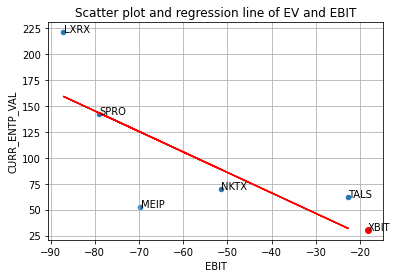

In [109]:
stat_used = "EBIT"
ax = companies_data.plot.scatter(stat_used, "CURR_ENTP_VAL", title=f"Scatter plot and regression line of EV and {stat_used}")
plt.scatter(studied_com_fin_data[stat], studied_com_fin_data['CURR_ENTP_VAL'], color='red')
# Annotate each data point
for i, txt in enumerate(companies_data.index):
   ax.annotate(txt, (companies_data[stat_used].iat[i]+0.05, companies_data["CURR_ENTP_VAL"].iat[i]))
for i, txt in enumerate(studied_com_fin_data.index):
   ax.annotate(txt, (studied_com_fin_data[stat_used].iat[i]+0.05, studied_com_fin_data["CURR_ENTP_VAL"].iat[i]))

X = companies_data[companies_data.index != studied_comp_ticker][[stat_used]].reset_index(drop=True)
Y = companies_data[companies_data.index != studied_comp_ticker]["CURR_ENTP_VAL"].reset_index(drop=True)

linear_regressor = LinearRegression()
linear_regressor.fit(X, Y)
print(f"\nCoefs ligne de regression :\na={round(linear_regressor.coef_[0], 4)}\nintercept={round(linear_regressor.intercept_, 4)}\n")

#EV estimation
studied_comp_row_single_var = studied_com_fin_data[studied_com_fin_data.index == studied_comp_ticker][[stat_used]].reset_index(drop=True)
estimated_EV = linear_regressor.predict(studied_comp_row_single_var)[0]

print_results(studied_comp_ticker, studied_com_fin_data.loc[studied_comp_ticker, 'CURR_ENTP_VAL'], estimated_EV, stat_used, "regression model")
# print(f"Real EV of {studied_comp_ticker}: {studied_com_fin_data.loc[studied_comp_ticker, 'CURR_ENTP_VAL']}")
# print(f"Estimated EV of {studied_comp_ticker} with regression model (using {stat_used}): {estimated_EV}")
# print(f"Real EV / Estimated EV : {studied_com_fin_data.loc[studied_comp_ticker, 'CURR_ENTP_VAL'] / estimated_EV}\n")

plt.plot(X, X*linear_regressor.coef_ + linear_regressor.intercept_, color='red')
plt.grid()
plt.show()

Estimation using multiple linear regression

In [110]:
stats_to_use = ["EBIT", "EBITDA", "GROSS_PROFIT"]
X = companies_data[companies_data.index != studied_comp_ticker][stats_to_use].reset_index(drop=True)
X = X.dropna(axis='columns')
dropped_col = list(set(stats_to_use) - set(X.columns.values))
if(len(dropped_col) != 0):
    print("Dropped following columns because of NaN's in their rows : " + str(dropped_col))
stats_to_use = X.columns.values
Y = companies_data[companies_data.index != studied_comp_ticker]["CURR_ENTP_VAL"].reset_index(drop=True)

linear_regressor2 = LinearRegression()
linear_regressor2.fit(X, Y)
print(f"\nCoefs ligne de regression :\ncoefs={linear_regressor2.coef_}\nintercept={round(linear_regressor2.intercept_, 4)}\n")

#EV estimation
studied_comp_row_multi_var = studied_com_fin_data[studied_com_fin_data.index == studied_comp_ticker][stats_to_use].reset_index(drop=True)
estimated_EV = linear_regressor2.predict(studied_comp_row_multi_var)[0]

print_results(studied_comp_ticker, studied_com_fin_data.loc[studied_comp_ticker, 'CURR_ENTP_VAL'], estimated_EV, str(stats_to_use), "multiple linear regression model")
# print(f"Real EV of {studied_comp_ticker}: {companies_data.loc[studied_comp_ticker, 'CURR_ENTP_VAL']}")
# print(f"Estimated EV of {studied_comp_ticker} with regression model (using all stats): {estimated_EV}")
# print(f"Real EV / Estimated EV : {companies_data.loc[studied_comp_ticker, 'CURR_ENTP_VAL'] / estimated_EV}\n")

Dropped following columns because of NaN's in their rows : ['GROSS_PROFIT']

Coefs ligne de regression :
coefs=[ 34.06703706 -36.17652495]
intercept=30.5722

*** ESTIMATIONS (with multiple linear regression model using ['EBIT' 'EBITDA']) ***
(Values are in millions of dollars)

Real EV of XBIT: 30.46087774
Estimated EV of XBIT : -11.837851437806563 
Estimated EV / Real EV : -0.38862476448804273
Estimated EV - Real EV : -42.298729177806564

-----------------------------------------------

